# Binary Classification Problem

This notebook is a step by step guide for replicating the classification results. The notebook adopted the thought process below:

1. Data Ingestion - this involved various steps used to read in the data properly
2. Data preparation/cleaning - this involved the use of various data cleaning custom functions to prepare the data in a usable format
3. Data Visualisation and Exploration - the cleaned data is visualised and explored to derive high-level understanding of features in readiness for modeling task
4. Data Modeling -  The data is trained using popular machine learning algorithms
5. Prediction and evaluation - the models are evaluated based on the results from predictions on the validation data. A pipeline was created at this step to reduce the code required to make predictions
6. Performance Optimization - the evaluated models are optimized to obtain the optimal model performance

In [1]:
# !pip install imbalanced-learn

### Initialization 

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import os
import matplotlib.pyplot as plt
import math
from datetime import datetime
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

## Reading in the Custom Data

### Brief Description of the Datasets

This is a **supervised learning task** meaning we have target labels in the dataset. Two types of datasets will be used in this task:
- One is the training dataset 
- The other is a validation dataset. 

We would read in the data below:

In [3]:
file_path = 'ds_take_home/Training.csv' #local file path
train_df_ = pd.read_csv(file_path)

train_df_.head()

v33 v76  v12 v68 v50     v7      v70      v55 v20 v24  ... v28  \
v  g 17.0 92   f   1   75   a   t   80.0        0   000054   1   u  ...   t   
   s 16.0 92   f   0   29   b   f  200.0        0  0000335   0   y  ...   f   
ff g 31.0 25   f   0    b   t  96    0.0  0001125        1   u   3  ...  ff   
o  g 48.0 17   f   0  335   a   f    0.0        0  0001335   0   u  ...   f   
v  g 32.0 33   t   0    5   b   f  232.0        0    00035   0   u  ...   t   

             v99     v95      v42  v53 v85 v9 v84  v44 classlabel  
v  g 17.0 92   c       t   800000    5   g  0   f    f        no.  
   s 16.0 92   k     NaN  2000000    0   p  1   f    f        no.  
ff g 31.0 25   t  960000       19    g   0  f   f  no.        NaN  
o  g 48.0 17   i     NaN        0  120   g  1   f    f        no.  
v  g 32.0 33   k       f  2320000    0   g  1   f    f        no.  

[5 rows x 22 columns]

In [4]:
train_df_.index

MultiIndex([( 'v', 'g', 17.0, '92'),
            ( 'v', 's', 16.0, '92'),
            ('ff', 'g', 31.0, '25'),
            ( 'o', 'g', 48.0, '17'),
            ( 'v', 'g', 32.0, '33'),
            ( 'h', 'g', 34.0, '83'),
            ( 'j', 'g', 26.0, '17'),
            ( 'h', 'g', 21.0, '17'),
            ( 'v', 'g', 28.0, '92'),
            ( 'h', 'g', 18.0, '17'),
            ...
            ( 'h', 'g', 23.0, '92'),
            ( 'v', 'g', 23.0, '25'),
            ( 'h', 'g', 46.0, '67'),
            ( 'h', 'g', 25.0,  't'),
            ( 'v', 'g', 25.0,  '5'),
            ( 'v', 'g', 18.0, '75'),
            ( 'v', 'g', 23.0,  '5'),
            ( 'v', 'g', 34.0, '17'),
            ( 'v', 'g', 27.0, '83'),
            ( 'v', 'g', 36.0, '75')],
           length=3700)

The dataset appears to be significantly malformed with the number of column values in the non-header rows exceeding the number of columns in the header which is evident in the multi-index above. The training dataset would need to be loaded but with these additional columns.

In [5]:
train_df = pd.read_csv(file_path).reset_index() #automatically adds additional column headers to the csv file

train_df.head()

,level_0,level_1,level_2,level_3,v33,v76,v12,v68,v50,v7,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.0,92,f,1,75,a,t,80.0,...,t,c,t,800000,5,g,0,f,f,no.
1,v,s,16.0,92,f,0,29,b,f,200.0,...,f,k,NaN,2000000,0,p,1,f,f,no.
2,ff,g,31.0,25,f,0,b,t,96,0.0,...,ff,t,960000,19,g,0,f,f,no.,NaN
3,o,g,48.0,17,f,0,335,a,f,0.0,...,f,i,NaN,0,120,g,1,f,f,no.
4,v,g,32.0,33,t,0,5,b,f,232.0,...,t,k,f,2320000,0,g,1,f,f,no.


## Data Preparation/Cleaning

In [6]:
train_df.shape

(3700, 26)

*The dataset has 3.7K records*

In [7]:
train_df.info() #viewing the number of nulls and data type in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     3634 non-null   object 
 1   level_1     3700 non-null   object 
 2   level_2     3661 non-null   float64
 3   level_3     3700 non-null   object 
 4   v33         3700 non-null   object 
 5   v76         3700 non-null   object 
 6   v12         3682 non-null   object 
 7   v68         3678 non-null   object 
 8   v50         3634 non-null   object 
 9   v7          3667 non-null   float64
 10  v70         3700 non-null   object 
 11  v55         3636 non-null   object 
 12  v20         3700 non-null   object 
 13  v24         3700 non-null   object 
 14  v32         3700 non-null   object 
 15  v97         3635 non-null   object 
 16  v28         3569 non-null   object 
 17  v99         3073 non-null   object 
 18  v95         2245 non-null   object 
 19  v42         3603 non-null  

About **30%** of the class labels are missing in the data. An easy fix would be to drop all samples with missing class labels however, we risk losing vital data that could potentially improve our model's performance.

**Assumption 1**

**Zooming in on the data, it appears that most of the missing values (especially for the class labels) are in adjacent columns to the left on the same row which resulted in the malformed data.**

To validate the above assumption, we would use a simple function that counts the number of null values in each row. Since we are particulary interested in keeping as much class labels as possible, we would only count rowwise nulls where the class label is null.

In [8]:
def count_rowise_nulls(data):
    """
    Function that counts the number of nulls in the last three cells in a row of a dataframe
    :param data: takes the dataframe as input
    return: count of nulls
    """
    cnt_nulls = [] #list to hold the count of nulls
    row_len = data.shape[0] #the number of rows in the dataset
    col_len = len(data.columns) #the number of columns
    for i in range(row_len):
        each_row = data.iloc[i,:] #gets an array of each row
        if any(list(each_row.isnull())[-3:]): #checks if any of the last 3 row values are null, which includes the class label
            cnt_nulls.append(each_row[-3:].isnull().sum()) #stores the number of nulls in the last 3 adjacent cells
        else:
            cnt_nulls.append(0) #this is executed if there is no null in the last 3 values in the row
    return cnt_nulls

In [9]:
%%time
col_num_nulls = count_rowise_nulls(train_df)

Wall time: 1.26 s


In [10]:
#basic unit test to validate the output
assert max(col_num_nulls)<= 3, 'The maximum count of non-nulls should not exceed 3'
print('Test passed!')

Test passed!


We have successful validated our first assumption to a good extent. To a good extent because some of the missing values are not in the immediate adjacent cells. However, in our data preparation we would first consider cases where the class label alone is missing before exploring other cases.

**Assumption 2**

1. It is assumed that all values in each feature are of the same data type 
2. It is assumed that for missing class lables with non-null adjacent cells, the beginning of the malformation is where the first wrong data type appeared

To validate the above assumption, functions are created to:
1. Determine the prevalent data type in each column
2. Get the column index of the first wrong data type for missing class labels with non-null adjacent cells
3. relocate the data to the next cell
4. Carry out unit tests to validate that the values in each column are of the same data type.

In [11]:
def get_dtypes(data):
    """
    Function that gets the actual data type for each column in a dataframe
    :param data: takes the dataframe as input
    return: a dictionary of the data types
    """
    column_data_types = {} #this dictionary will hold the data type for each column 
    for col in data.columns:
        data_types = [] 
        for val in data[col]: #looping through the values in each column
            try:
                data_types.append(type(int(val))) #we would try to convert to an integer 
            except:
                data_types.append(type(val))  #if the above operation fails we exit and store the data type 
        count_dict = dict(Counter(data_types)) #this counts the occurence of each data type in each column
        col_dtype = max(count_dict, key=count_dict.get) #this variable stores the highest occuring data type
        column_data_types[col] = col_dtype
    return column_data_types

In [12]:
%%time
#getting the prevailing data type for the train_df
prevailing_col_dtypes = get_dtypes(train_df)

Wall time: 103 ms


In [13]:
def data_relocation(data, col_types, null_condition):
    """
    This function relocates the data from the point of malformation to the assumed position as part of the
    data cleaning process.
    :param data: the dataframe to be cleaned
    :param col_types: the dictionary of the prevalent data types
    :null_condition: the count of nulls
    return: doesn't return any value but updates the dataframe in-memory
    """
    col_types_val = list(col_types.values()) #getting the dtypes and storing it as a list
    length = data.shape[0] #storing the number of rows
    for ind, num in zip(range(length),null_condition): #this will loop through each row and null_condition
        if num == 1: #this allows us to focus on missing class label instances for now
            start_indices = [] #creates a place holder to store the column index of where the malformation began
            row_array = list(data.iloc[ind,:].values) #stores the original malformed row values
            for i, val in zip(range(len(row_array)), row_array): #loops through each row value
                try:
                    col_types_val[i](val) #this tries to apply the prevailing column type to each value
                except:
                    start_indices.append(i) #this is executed once the above operation fails which registers the \
                    #index of a variable with the wrong data type.
            start_index = start_indices[0] #this retrieves the first index only which marks the beginning of the malformation
            
            #the logic below keeps all values before the start_index, replaces the value of the start index with null\
            #then relocates the original values to the next cell
            new_row_array = list(row_array[:start_index] + [np.nan] + row_array[start_index:-1])
            data.loc[ind,:] = new_row_array #the dataframe is updated with the new row

In [14]:
%%time
data_relocation(train_df, prevailing_col_dtypes, col_num_nulls)

Wall time: 5.83 s


In [15]:
train_df.head()

,level_0,level_1,level_2,level_3,v33,v76,v12,v68,v50,v7,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.0,92,f,1,75,a,t,80,...,t,c,t,800000,5,g,0,f,f,no.
1,v,s,16.0,92,f,0,29,b,f,200,...,f,k,NaN,2000000,0,p,1,f,f,no.
2,ff,g,31.0,25,f,0,NaN,b,t,96,...,f,ff,t,960000,19,g,0,f,f,no.
3,o,g,48.0,17,f,0,335,a,f,0,...,f,i,NaN,0,120,g,1,f,f,no.
4,v,g,32.0,33,t,0,5,b,f,232,...,t,k,f,2320000,0,g,1,f,f,no.


In [16]:
count_old_nulls = 1314
count_new_nulls = train_df.classlabel.isnull().sum()
pct_nulls = round((count_new_nulls/train_df.shape[0])*100, 2)
print("The class label now has {0} missing values compared with {1} before data cleaning. \
The new missing data is only {2}% of the dataset".format(
    count_new_nulls, count_old_nulls, pct_nulls))

The class label now has 201 missing values compared with 1314 before data cleaning. The new missing data is only 5.43% of the dataset


Finally, we need to validate by checking consistent data types in each column. In simpler terms, there should be no values with the wrong data types in any column.

firstly, we need to filter the dataframe to the non-null class labels only

In [17]:
#filtering to non-nulls
train_df_class_non_null = train_df[~train_df['classlabel'].isnull()]

secondly, we acknowledge the presence of null values in other columns. so we need to fill nulls with a value

In [18]:
#fill na with zero, which should work well across all columns
train_df_class_non_null.fillna(0, inplace=True)

lastly, run a basic unit test below to confirm. Since pandas recognises most columns as strings, we can focus on the integer columns validation and should be fine

In [19]:
#first test
for col_name, dtype in prevailing_col_dtypes.items():
    if dtype == int: #checks if datatype is integer
        train_df_class_non_null[col_name] = train_df_class_non_null[col_name].astype(dtype) #applies the data type to the column

In [20]:
#save the processed train data for easy load
train_df_class_non_null.to_csv('Processed_train_data.csv', index=None)

In [21]:
#final unit test
column_dtypes = list(prevailing_col_dtypes.values())
for col_name, dt in zip(train_df_class_non_null.columns, column_dtypes):
    if dtype == int:
        assert train_df_class_non_null[col_name].dtype==dt or 'int32', 'Wrong data type'
    else:
        assert train_df_class_non_null[col_name].dtype==dt or 'object', 'Wrong data type'

print('All Tests passed!') #This is printed only if there are no errors

All Tests passed!


**Through the above data cleaning steps we have successfully kept 95% of the data. 
We can now commence data exploration and visualization**

## Data Exploration and Visualization

In [22]:
# train_df_class_non_null = pd.read_csv('Processed_train_data.csv')
train_df_class_non_null.describe()

,level_2,level_3,v76,v12,v7,v70,v55,v20,v32,v97,v42,v53,v9
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.0,3499.000000,3499.000000,3499.000000,3499.000000,3.499000e+03,3499.000000,3499.000000
mean,31.857102,40.730209,3.087454,126.218634,162.022578,0.0,1315.905973,4.306373,2.828237,44.697056,1.620226e+06,2334.309803,0.495570
std,12.608574,31.406023,4.279582,226.785620,155.734802,0.0,3222.346048,6.864938,1.046349,30.838830,1.557348e+06,8943.940550,0.500052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,22.000000,8.000000,0.000000,4.000000,0.000000,0.0,15.000000,0.000000,2.000000,15.000000,0.000000e+00,0.000000,0.000000
50%,28.000000,33.000000,1.000000,25.000000,120.000000,0.0,125.000000,2.000000,3.000000,44.000000,1.200000e+06,134.000000,0.000000
75%,39.000000,75.000000,5.000000,85.000000,280.000000,0.0,835.000000,6.000000,4.000000,72.000000,2.800000e+06,1000.000000,1.000000
max,80.000000,92.000000,28.000000,875.000000,1160.000000,0.0,26335.000000,67.000000,6.000000,99.000000,1.160000e+07,100000.000000,1.000000


**v70 and v9** appear not to contain any useful information especially v70 which has no data distribution.

In [23]:
pd.value_counts(train_df_class_non_null['v70'])

0    3499
Name: v70, dtype: int64

In [24]:
pd.value_counts(train_df_class_non_null['v9'])

0    1765
1    1734
Name: v9, dtype: int64

We would drop feature V70 moving forward but keep feature v9 as it appears to be a categorical/binary variable.

Now, Let us visualize the distribution of the target variable

Number of No:  3238
Number of Yes :  261


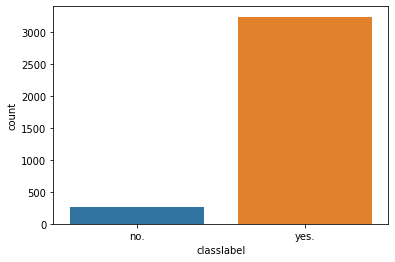

In [25]:
y = train_df_class_non_null.classlabel
ax = sns.countplot(y,label="Count")
N, Y = y.value_counts()
print('Number of No: ',N)
print('Number of Yes : ',Y)

**This is an imbalanced dataset**.

Next we need to create a violin plot of the numeric features but first we need to standardize the features

In [26]:
num_features = ['level_2','level_3','v76','v12','v7','v55','v20','v32','v97','v42','v53','v9']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

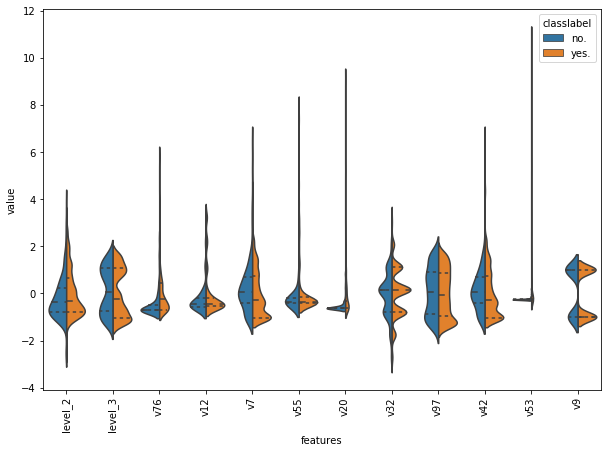

In [27]:
data_numeric = train_df_class_non_null[num_features] #filtering only the numeric features
data_standardized = (data_numeric - data_numeric.mean()) / (data_numeric.std())
data_viz = pd.concat([y,data_standardized], axis=1)
data_viz = pd.melt(data_viz,id_vars="classlabel",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,7))
sns.violinplot(x="features", y="value", hue="classlabel", data=data_viz,split=True, inner="quart")
plt.xticks(rotation=90)

The numeric variables do not seem to provide visible separation of the class label. This is further confirmed by the box plot below. It is however, apparent that most of the numberic features are **multi-modal**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

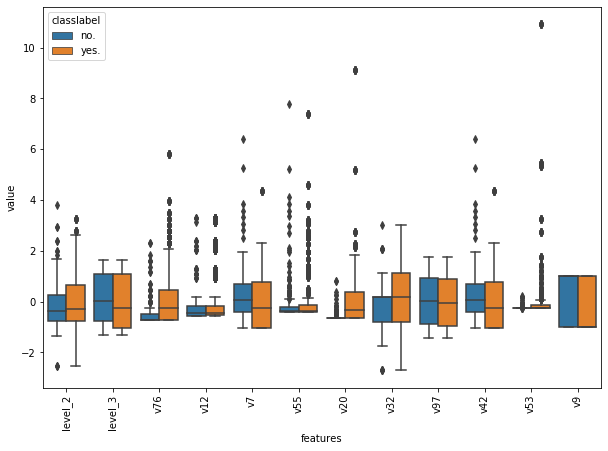

In [28]:
#box plot
plt.figure(figsize=(10,7))
sns.boxplot(x="features", y="value", hue="classlabel", data=data_viz)
plt.xticks(rotation=90)

Next, we observe the correlation between all features. But first we need to convert the categorical features to numerical features

In [29]:
cat_features = [col for col in train_df_class_non_null.columns if col !='v70' and col not in num_features]

In [30]:
def preprocess_categorical(data, features):
    """
    This function simply converts categorical variables to numeric variables.
    :param data: the dataframe to be cleaned
    :param features: categorical features
    return: doesn't return any value but transforms the dataframe in-memory
    """
    for col in features:
        data[col].replace({0:'0'}, inplace=True)#replace the filled null values as string ero
        le = LabelEncoder() # Create an instance of label Encoder.
        data[col] = le.fit_transform(data[col]) #fit and transform the variable to numeric

In [31]:
%%time
preprocess_categorical(train_df_class_non_null, cat_features)

Wall time: 24 ms


In [32]:
##simple test
pd.value_counts(train_df_class_non_null['classlabel'])

1    3238
0     261
Name: classlabel, dtype: int64

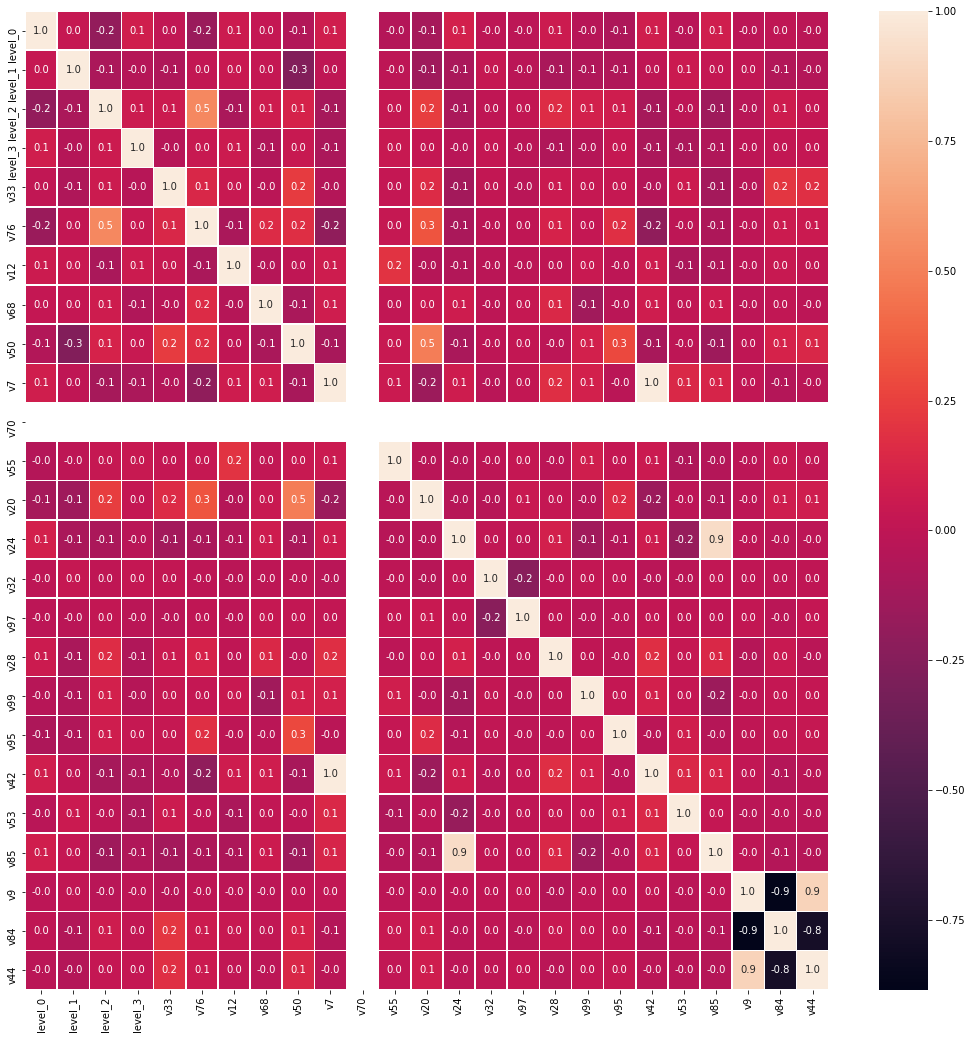

In [33]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
x = train_df_class_non_null.iloc[:,:-1]#all the data except the class label
# x = data_numeric
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

There are a number of correlated features:
1. **V7 and v42**
2. **V85 and v24**
3. **v84 and v9** and
4. **v44 and v84**

In [34]:
cols_to_drop = ['v84', 'v70', 'v85', 'v7']
train_data = train_df_class_non_null.drop(cols_to_drop, axis=1)

## Modeling 

In [35]:
X = train_data.iloc[:,:-1]
y = train_data['classlabel']
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
print('Dataset shape %s' % Counter(Y_val))

Dataset shape Counter({1: 808, 0: 67})


In [37]:
baseline_model = LogisticRegression().fit(X_train, Y_train)

In [38]:
y_pred = baseline_model.predict(X_val)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [40]:
print("the accuracy: %s" % accuracy_score(Y_val, y_pred))
print("the precision: %s" % precision_score(Y_val, y_pred))
print("the recall: %s" % recall_score(Y_val, y_pred))

the accuracy: 0.9234285714285714
the precision: 0.9234285714285714
the recall: 1.0


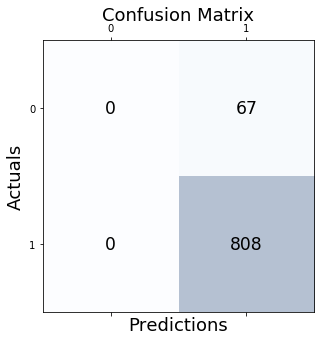

In [41]:
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=y_pred)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_ov, y_ov = sm.fit_resample(X_train, Y_train)

print('Resampled dataset shape %s' % Counter(y_ov))

Resampled dataset shape Counter({1: 2430, 0: 2430})


In [43]:
LR_oversample = LogisticRegression().fit(X_ov, y_ov)

In [44]:
y_pred_ov = LR_oversample.predict(X_val)

In [45]:
print("the oversampling accuracy: %s" % accuracy_score(Y_val, y_pred_ov))
print("the oversampling precision: %s" % precision_score(Y_val, y_pred_ov))
print("the oversampling recall: %s" % recall_score(Y_val, y_pred_ov))

the oversampling accuracy: 0.632
the oversampling precision: 0.9673076923076923
the oversampling recall: 0.6225247524752475


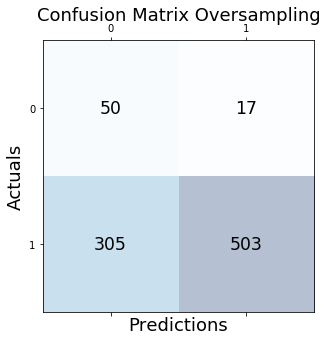

In [46]:
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=y_pred_ov)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix Oversampling', fontsize=18)
plt.show()

## Prediction

The steps below would be used to deliver predictions on the validation (ou-of-box) set:

- Package the various preprocessing steps into a utility script called 'preprocess.py'
- Load and preprocess the validation data
- Run batch predictions using the two models above
- Evaluate predictions using accuracy, precision and recall.

In [47]:
##view content of the preprocessor
!pygmentize preprocess.py

import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from collections import Counter


def count_rowise_nulls(data):
    """
    Function that counts the number of nulls in the last three cells in a row of a dataframe
    :param data: takes the dataframe as input
    return: count of nulls
    """
    cnt_nulls = [] #list to hold the count of non nulls
    row_len = data.shape[0] #the number of rows in the dataset
    col_len = len(data.columns) #the number of columns
    for i in range(row_len):
        each_row = data.iloc[i,:] #gets an array of each row
        if any(list(each_row.isnull())[-3:]): #checks if any of the last 3 row values are null, which includes the class label
            cnt_nulls.append(each_row[-3:].isnull().sum()) #stores the number of nulls in the last 3 adjacent cells
        else:
            cnt_nulls.append(0) #this is executed if there is no null in the last 3 values in the row
    return cnt_nulls

def get_dty

In [48]:
#load the data
val_file_path = 'ds_take_home/Validation.csv'
validation_data = pd.read_csv(val_file_path).reset_index()

validation_data.head()

,level_0,level_1,level_2,level_3,v33,v76,v12,v68,v50,v7,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,bb,s,32.0,33,t,1,585,b,f,420.0,...,t,e,NaN,4200000,0,g,1,f,t,no.
1,v,g,23.0,58,f,0,54,b,f,136.0,...,t,c,NaN,1360000,1,g,0,f,f,no.
2,v,g,36.0,42,t,0,585,b,f,240.0,...,f,d,NaN,2400000,3,p,1,f,f,no.
3,v,g,18.0,42,f,0,125,b,f,120.0,...,f,aa,NaN,1200000,375,p,0,t,f,no.
4,v,g,24.0,5,t,0,04,b,f,120.0,...,t,aa,f,1200000,475,p,0,f,f,no.


In [49]:
validation_data.shape

(200, 26)

In [50]:
import preprocess
## apply the various preprocessing tests
val_col_num_nulls = preprocess.count_rowise_nulls(validation_data)
val_col_dtypes = preprocess.get_dtypes(validation_data)
preprocess.data_relocation(validation_data, val_col_dtypes, val_col_num_nulls)

In [51]:
validation_data.classlabel.isnull().sum()

6

In [52]:
#filtering to non-nulls
val_class_non_null = validation_data[~validation_data['classlabel'].isnull()]
#fill nulls
val_class_non_null.fillna(0, inplace=True)

In [53]:
val_class_non_null.shape

(194, 26)

We won't be able to run predicitions on all the dataset as about 6 of the data is still malformed and there is no easy automated way to clean the data

In [54]:
# carry out unit tests to confirm
import preprocess_unittests as test

test.test_col_nulls(val_col_num_nulls)
test.verify_relocation(val_class_non_null, val_col_dtypes)

Tests Passed!
Tests Passed!


Finally, convert to categorical features

In [55]:
%%time
preprocess_categorical(val_class_non_null, cat_features)

Wall time: 12 ms


### Running and Evaluating Predictions 

let's define all helper functions for performance evaluation since we would be reusing often:
1. Accuracy, precision and recall
2. confusion matrix
3. ROC

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [57]:
def conf_mat(estimator, X_test, y_test):
    plot_confusion_matrix(estimator, X_test, y_test)
    plt.show()

In [58]:
def pred_metrics(y_test, y_pred):
    rept = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    print("The accuracy of the model is {0}%".format(round(rept["accuracy"]*100,3)))
    print("The recall of the model is {0}%".format(round(rept["weighted avg"]["recall"]*100,3)))
    print("The precision of the model is {0}%".format(round(rept["weighted avg"]["precision"]*100,3)))
    return rept

The **Area-under-the curve (AUC)** is an aggregate indication of the model performance across different probability thresholds. Most ML algorithms adopt a 50% threshold which means if the predicted probability of an observation belonging to a class is less than 50%, the model will assign the observation to the opposite class and vice versa. An AUC of 60% means the model performs 10% better than random guessing across different thresholds. AUC ranges from 0 to 100% so an AUC of 100% means the model is perfect and predicts all classes correctly all the time regardless of the threshold.

In [59]:
def ROC(y_test, y_score):
    #create a place holder dictionary to hold the different calculations
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure()
    
    fpr, tpr, _ = roc_curve(y_true,  y_score[::,1]) #returns the fpr and tpr
    auc = roc_auc_score(y_true, y_score[::,1]) #extracts the area under the curver for each class
    plt.plot(fpr,tpr,color = 'darkorange', label="AUC="+str(auc))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--') #random guessing model (AUC = 0.5) - for benchmarking
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [60]:
#drop columns
val_data = val_class_non_null.drop(cols_to_drop, axis=1)
X_true = val_data.iloc[:,:-1]
y_true = val_data.classlabel

In [61]:
bm_pred = baseline_model.predict(X_true)
ov_pred = LR_oversample.predict(X_true)

In [62]:
print("Evaluating Baseline Performance on Out-of-bag set")
pd.DataFrame(pred_metrics(y_true, bm_pred))

Evaluating Baseline Performance on Out-of-bag set
The accuracy of the model is 47.423%
The recall of the model is 47.423%
The precision of the model is 22.489%


,0,1,accuracy,macro avg,weighted avg
precision,0.0,0.474227,0.474227,0.237113,0.224891
recall,0.0,1.000000,0.474227,0.500000,0.474227
f1-score,0.0,0.643357,0.474227,0.321678,0.305097
support,102.0,92.000000,0.474227,194.000000,194.000000


**Baseline Model**

The **Recall** which is **(TP) / (TP + FN)** - for the negative class (0) is **0%**, depicts that the model is **totally incapable of predicting the negative class**. This could be a problem if the goal of the model is to predict the negative class. The average recall of the model is about **47%**. The **Precision - (TP) / (TP + FP)** - is way below random guessing (23%). The model is only capable of predicting the positive class (1) efficiently (100% recall).

The Area-under-the curve (AUC) is about **60%** which means the model performs **10%** better than random guessing across different thresholds.

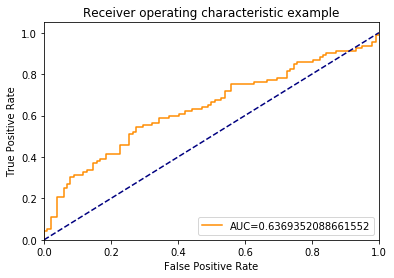

In [63]:
y_score_bm = baseline_model.predict_proba(X_true)
ROC(y_true, y_score_bm)

In [64]:
print("Evaluating Oversampled Performance on Out-of-bag set")
pd.DataFrame(pred_metrics(y_true, ov_pred))

Evaluating Oversampled Performance on Out-of-bag set
The accuracy of the model is 70.103%
The recall of the model is 70.103%
The precision of the model is 70.103%


,0,1,accuracy,macro avg,weighted avg
precision,0.715686,0.684783,0.701031,0.700234,0.701031
recall,0.715686,0.684783,0.701031,0.700234,0.701031
f1-score,0.715686,0.684783,0.701031,0.700234,0.701031
support,102.000000,92.000000,0.701031,194.000000,194.000000


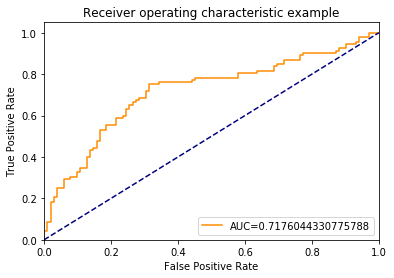

In [65]:
y_score_lr = LR_oversample.predict_proba(X_true)
ROC(y_true, y_score_lr)

**Oversampled Model**

The **Recall** for the negative class (0) is **71%**, depicts that the model is **Good at predicting the negative class**. This could be useful if the goal is to predict the negative class despite the few observations. The average recall of the model is about **70%**. The **Precision** - is also around **(70%)**. The model is equally capable in predicting the positive class (1).

The Area-under-the curve (AUC) is about **71%** which means the model performs **20%** better than random guessing across different thresholds.

### Attempt at Optimizing Model Performance 

The following steps would be followed to try and achieve optimal performance on the validation set:
1. Try new algorithms - Random forest model and Support Vector Machines on the oversampled data
2. Try Feature selection
3. Use Cross validation on the best model

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [67]:
#remember to use the oversampled data
svm_model = svm.SVC().fit(X_ov,y_ov)
rf_model = RandomForestClassifier().fit(X_ov, y_ov)

In [68]:
#predict on the validation (out-of-bag) set
y_pred_svm = svm_model.predict(X_true)
y_pred_rf = rf_model.predict(X_true)

In [69]:
#evaluate
print("Evaluating SVM Performance on Out-of-bag set")
pd.DataFrame(pred_metrics(y_true, y_pred_svm))
print("\n\n")
print("Evaluating Random Forest Performance on Out-of-bag set")
pd.DataFrame(pred_metrics(y_true, y_pred_rf))

Evaluating SVM Performance on Out-of-bag set
The accuracy of the model is 64.948%
The recall of the model is 64.948%
The precision of the model is 65.295%



Evaluating Random Forest Performance on Out-of-bag set
The accuracy of the model is 48.969%
The recall of the model is 48.969%
The precision of the model is 49.154%


,0,1,accuracy,macro avg,weighted avg
precision,0.515789,0.464646,0.489691,0.490218,0.491536
recall,0.480392,0.500000,0.489691,0.490196,0.489691
f1-score,0.497462,0.481675,0.489691,0.489569,0.489976
support,102.000000,92.000000,0.489691,194.000000,194.000000


**Logistic Regression** still appears to be the best model!

**Feature Selection**

The Recursive Feature Elimination (RFE) with random forest would be employed. It basically starts from the entire feature set and converges to a smaller subset of "optimal" features through recursively pruning the least important features. 
You can read more here https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

We would start with 5 features and progress to 6 or reduce to 4 and see if the performance dips

In [70]:
from sklearn.feature_selection import RFE
# Create the RFE object
rf_model_1 = RandomForestClassifier()
n_features = 5
rfe = RFE(estimator=rf_model_1, n_features_to_select=n_features, step=1)
rfe = rfe.fit(X_ov, y_ov)

print('Chosen best 5 feature by rfe:',X_ov.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['v33', 'v50', 'v20', 'v99', 'v44'], dtype='object')


repeat the cell above for 4,10,15 and 20 features

In [71]:
#helper function to generate features space
def create_feat_grid(feat_space):
    chosen_best = {}
    for n in feat_space:
        rfe = RFE(estimator=rf_model_1, n_features_to_select=n, step=1)
        rfe = rfe.fit(X_ov, y_ov)
        chosen_best[n] = list(X_ov.columns[rfe.support_])
    return chosen_best

#function that caclulates the performance based on chosen features
def compare_perf_features(feat_space):
    feature_space = create_feat_grid(feat_space)
    accuracy_dict = {}
    for n_feat, feat in feature_space.items():
        new_X = X_ov[feat]
        LR_model = LogisticRegression().fit(new_X, y_ov)
        y_pred = LR_model.predict(X_true[feat])
        accuracy_dict[n_feat] = accuracy_score(y_true, y_pred)
    return accuracy_dict

In [72]:
%%time
search_result = compare_perf_features([4,5,10,15,20])

Wall time: 13.8 s


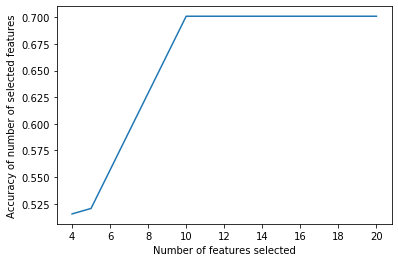

In [73]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy of number of selected features")
plt.plot(list(search_result.keys()), list(search_result.values()))

You can see the model's performance doesn't improve after 10 best features

In [74]:
best_features = create_feat_grid([4,5,10,15,20])[10]
best_features

['level_3', 'v33', 'v76', 'v50', 'v20', 'v99', 'v95', 'v42', 'v53', 'v44']

**Finally, we would cross validate on the paramters of the most performant model**

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_ov,y_ov)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.6524691358024691


The training accuracy is higher!

In [76]:
LR_optimized = LogisticRegression(C=0.001, penalty='l2')
LR_optimized.fit(X_ov[best_features],y_ov) #remember to use the best features
y_pred_opt = LR_optimized.predict(X_true[best_features])
pd.DataFrame(pred_metrics(y_true, y_pred_opt))

The accuracy of the model is 70.103%
The recall of the model is 70.103%
The precision of the model is 70.41%


,0,1,accuracy,macro avg,weighted avg
precision,0.686441,0.723684,0.701031,0.705062,0.704103
recall,0.794118,0.597826,0.701031,0.695972,0.701031
f1-score,0.736364,0.654762,0.701031,0.695563,0.697666
support,102.000000,92.000000,0.701031,194.000000,194.000000


### Conclusion 

**The cross validated model - LogisticRegression(c=0.001, penalty = 'l2') is no better than the simple Logistic regression algorithm**

### Limitations 

This project did not consider all the validation data (about 3%) in its predictions due to the malformation of some values

### Areas of Improvement

1. In the future, once can consider other more complex algorithms like xgboost
2. Most of the data cleaning and preprocessing functions are not optimised and might give sub-optimal performance in production systems. Consider optimizing functions to reduce iterations and search space.